In [1]:
import numpy as np
ls = 2**13
data = np.fromfile('soliton.bin')
lt = np.shape(data)[0]//(3*ls)
# data = data.reshape(ls*lt, 3)
data = data.reshape(np.shape(data)[0]//3, 3)
radius = np.zeros((ls))
time = np.zeros((lt))
field = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    radius[i] = data[i,1]
    
for i in range ((lt)):
    for j in range ((ls)):
        field[i,j] = data[ls*i+j,2]        

In [2]:
print(time)

[1.0000e-03 2.0000e-03 3.0000e-03 ... 1.9024e+01 1.9025e+01 1.9026e+01]


In [3]:
print(field)

[[ 3.65916899e-12 -3.66306067e-12  3.66695629e-12 ... -3.64751575e-12
   3.65139561e-12 -3.65528039e-12]
 [ 4.29575290e-12 -4.30210790e-12  4.30846822e-12 ... -4.27672839e-12
   4.28306190e-12 -4.28940347e-12]
 [ 2.73156713e-12 -2.73765646e-12  2.74375118e-12 ... -2.71333915e-12
   2.71940792e-12 -2.72548385e-12]
 ...
 [ 2.72300780e-16 -2.79734362e-16  2.74311626e-16 ... -2.75816965e-16
   2.71274363e-16 -2.77057333e-16]
 [ 2.75454769e-16 -2.82671706e-16  2.76969740e-16 ... -2.78940923e-16
   2.74383435e-16 -2.80254693e-16]
 [ 2.74385751e-16 -2.81915008e-16  2.76653915e-16 ... -2.78183442e-16
   2.73732730e-16 -2.79336300e-16]]


(400.0, 600.0)

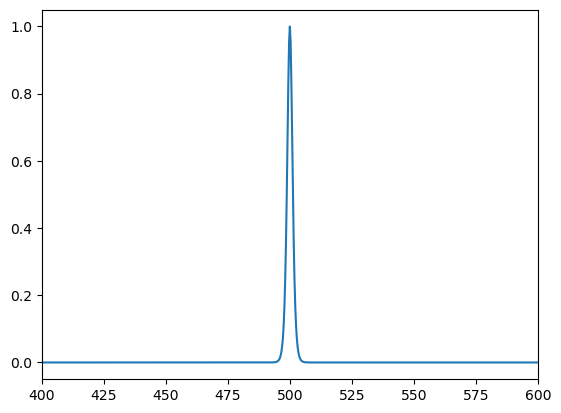

In [4]:
import matplotlib.pyplot as pl
pl.plot(radius[:], field[0,:])
pl.xlim(400,600)

(400.0, 600.0)

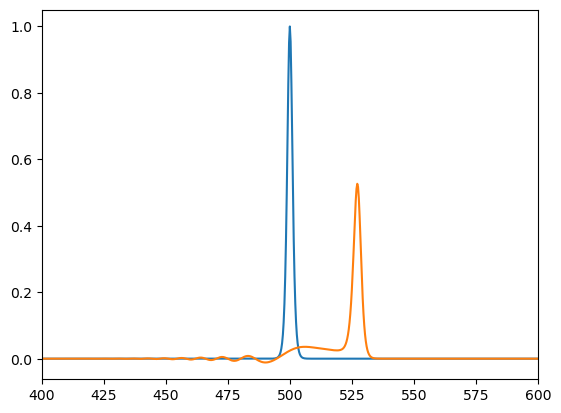

In [5]:
# for i in range(lt):
#     pl.plot(radius[:], field[i,:])
#     pl.xlim(400,600)
pl.plot(radius[:], field[1,:])
pl.plot(radius[:], field[lt-1,:])
pl.xlim(400,600)